## 开发环境

In [1]:
%matplotlib inline
import sys 
print('python版本：')
print(sys.version) 
print(sys.version_info)

python版本：
3.5.4 |Continuum Analytics, Inc.| (default, Aug 14 2017, 13:41:13) [MSC v.1900 64 bit (AMD64)]
sys.version_info(major=3, minor=5, micro=4, releaselevel='final', serial=0)


## 数据探索

### 20newsgroups数据集

数据加载

In [2]:
from sklearn.datasets import fetch_20newsgroups
fetch_20newsgroups(data_home = 'dataFiles',categories = None,shuffle = True,random_state = 1)
train_data = fetch_20newsgroups(data_home = 'dataFiles',subset = 'train',categories = None,shuffle = True,random_state = 1)
test_data = fetch_20newsgroups(data_home = 'dataFiles',subset = 'test',categories = None,shuffle = True,random_state = 1)

数据集中data属性表示每个新闻的内容；filenames表示每个新闻的文件名称；target表示每个新闻的类别id；target_names表示新闻所包含的不同类别。

数据集大小：训练数据集为11314条，测试数据集为7532条

In [3]:
print('train data length:',len(train_data.data))
print('test data length:',len(test_data.data))

train data length: 11314
test data length: 7532


新闻类别展示：训练数据集和测试数据集都有20个新闻类别

In [4]:
print('train data target length:',len(train_data.target_names),'\n')
print('train data target names:',train_data.target_names,'\n')
print('test data target length:',len(test_data.target_names),'\n')
print('test data target names:',test_data.target_names)

train data target length: 20 

train data target names: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc'] 

test data target length: 20 

test data target names: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


分析前十条新闻

In [5]:
print('前十条新闻文件名称为：')
print(train_data.filenames[:10])

前十条新闻文件名称为：
[ 'dataFiles\\20news_home\\20news-bydate-train\\talk.politics.mideast\\76141'
 'dataFiles\\20news_home\\20news-bydate-train\\alt.atheism\\53281'
 'dataFiles\\20news_home\\20news-bydate-train\\talk.politics.mideast\\76350'
 'dataFiles\\20news_home\\20news-bydate-train\\sci.crypt\\15509'
 'dataFiles\\20news_home\\20news-bydate-train\\rec.sport.hockey\\54242'
 'dataFiles\\20news_home\\20news-bydate-train\\soc.religion.christian\\20631'
 'dataFiles\\20news_home\\20news-bydate-train\\comp.sys.mac.hardware\\51946'
 'dataFiles\\20news_home\\20news-bydate-train\\talk.politics.mideast\\75396'
 'dataFiles\\20news_home\\20news-bydate-train\\sci.med\\59227'
 'dataFiles\\20news_home\\20news-bydate-train\\sci.electronics\\53549']


In [6]:
print('前十条新闻类别id为：')
print(train_data.target[:10])

前十条新闻类别id为：
[17  0 17 11 10 15  4 17 13 12]


In [7]:
print('第一条新闻内容为：')
print(train_data.data[0])

第一条新闻内容为：
From: ab4z@Virginia.EDU ("Andi Beyer")
Subject: Re: Israeli Terrorism
Organization: University of Virginia
Lines: 15

Well i'm not sure about the story nad it did seem biased. What
I disagree with is your statement that the U.S. Media is out to
ruin Israels reputation. That is rediculous. The U.S. media is
the most pro-israeli media in the world. Having lived in Europe
I realize that incidences such as the one described in the
letter have occured. The U.S. media as a whole seem to try to
ignore them. The U.S. is subsidizing Israels existance and the
Europeans are not (at least not to the same degree). So I think
that might be a reason they report more clearly on the
atrocities.
	What is a shame is that in Austria, daily reports of
the inhuman acts commited by Israeli soldiers and the blessing
received from the Government makes some of the Holocaust guilt
go away. After all, look how the Jews are treating other races
when they got power. It is unfortunate.



新闻内容过长，因此我们输出前十条新闻前200个字符

In [8]:
print('前十条新闻的每条的前200个字符：')
for i in range(10):
    print('第',i + 1,'条:',train_data.data[i][:200])

前十条新闻的每条的前200个字符：
第 1 条: From: ab4z@Virginia.EDU ("Andi Beyer")
Subject: Re: Israeli Terrorism
Organization: University of Virginia
Lines: 15

Well i'm not sure about the story nad it did seem biased. What
I disagree with is 
第 2 条: From: timmbake@mcl.ucsb.edu (Bake Timmons)
Subject: Re: Amusing atheists and agnostics
Lines: 66


James Hogan writes:

timmbake@mcl.ucsb.edu (Bake Timmons) writes:
>>Jim Hogan quips:

>>... (summary 
第 3 条: From: bc744@cleveland.Freenet.Edu (Mark Ira Kaufman)
Subject: Re: rejoinder. Questions to Israelis
Organization: Case Western Reserve University, Cleveland, Ohio (USA)
Lines: 38
NNTP-Posting-Host: tho
第 4 条: From: ray@ole.cdac.com (Ray Berry)
Subject: Clipper- business as usual?
Article-I.D.: ole.1993Apr20.173039.4722
Organization: Cascade Design Automation
Lines: 17


    Notwithstanding all the legitima
第 5 条: From: kkeller@mail.sas.upenn.edu (Keith Keller)
Subject: Playoff pool rule revision
Organization: University of Pennsylvania, School of Arts an

前十条新闻后200个字符

In [9]:
print('前十条新闻的每条的后200个字符：')
for i in range(10):
    print('第',i + 1,'条:',train_data.data[i][-200:])

前十条新闻的每条的后200个字符：
第 1 条: Israeli soldiers and the blessing
received from the Government makes some of the Holocaust guilt
go away. After all, look how the Jews are treating other races
when they got power. It is unfortunate.

第 2 条: ntstone's Chewables!  :) 
--
Bake Timmons, III

-- "...there's nothing higher, stronger, more wholesome and more useful in life
than some good memory..." -- Alyosha in Brothers Karamazov (Dostoevsky)

第 3 条:  stock, your 'Center' is considered a
joke, and until you either go away, or make at least some attempt
to be objective, you will have a place of honor among the clowns,
bigots, and idiots of Usenet.

第 4 条: t to a problematic scenario for them, even if the extent of usage
never surpasses the 'underground' stature of PGP.
-- 
Ray Berry kb7ht ray@ole.cdac.com  rjberry@eskimo.com  73407.3152@compuserve.com

第 5 条: y!!!  Good!

--
    Keith Keller				LET'S GO RANGERS!!!!!
						LET'S GO QUAKERS!!!!!
	kkeller@mail.sas.upenn.edu		IVY LEAGUE CHAMPS!!!!

     

通过观察，文本内容前面还是比较统一的格式，而后面内容各不相同。

各个种类新闻的数目

In [10]:
from collections import Counter
train_cnt = Counter()
test_cnt = Counter()
for temp in train_data.target:
    train_cnt[temp] += 1
for temp in test_data.target:
    test_cnt[temp] += 1

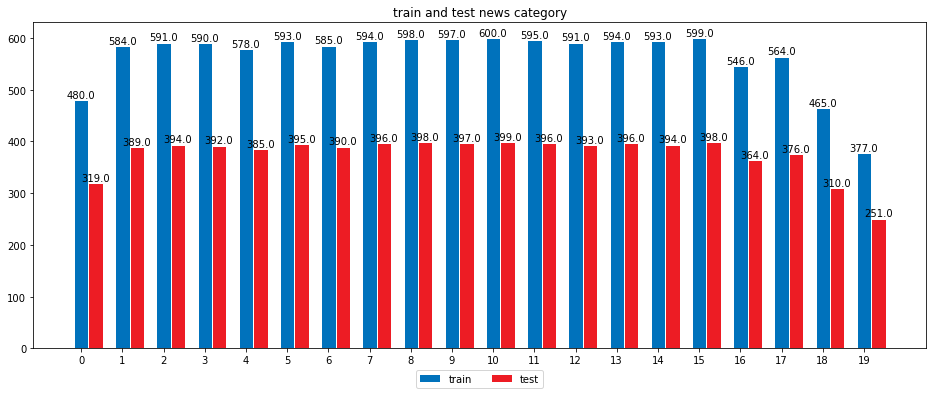

In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
def bar_of_target(cnt_1,cnt_2):
    name_list = range(20)
    num_list_1 = [cnt_1[x] for x in name_list]
    num_list_2 = [cnt_2[x] for x in name_list]

    font_size = 10 # 字体大小
    fig_size = (16, 6) # 图表大小

    # 更新字体大小
    mpl.rcParams['font.size'] = font_size
    # 更新图表大小
    mpl.rcParams['figure.figsize'] = fig_size
    # 设置柱形图宽度
    bar_width = 0.35

    index = np.arange(20)
    # 绘制 train
    rects1 = plt.bar(index, num_list_1, bar_width, color='#0072BC', label='train')
    # 绘制 test
    rects2 = plt.bar(index + bar_width, num_list_2, bar_width, color='#ED1C24', label='test')
    # X轴标题
    plt.xticks(index, name_list)
    # Y轴范围
    #plt.ylim(ymax=100, ymin=0)
    # 图表标题
    plt.title('train and test news category')
    # 图例显示在图表下方
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, ncol=5)

    # 添加数据标签
    def add_labels(rects):
        for rect in rects:
            height = rect.get_height()
            plt.text(rect.get_x() + rect.get_width() / 2, height, height, ha='center', va='bottom')
            # 柱形图边缘用白色填充，纯粹为了美观
            rect.set_edgecolor('white')

    add_labels(rects1)
    add_labels(rects2)

    
bar_of_target(train_cnt,test_cnt)

由上图可见，首部和尾部类别的新闻数据稍微少一些，其他类别的新闻数据分布还是比较均匀的。总体来说，这些数据比较适合进行训练分类的。

## 数据预处理

分词处理

In [12]:
from nltk import word_tokenize
train_tokens = [word_tokenize(temp) for temp in train_data.data]

查看第一个新闻的分词结果：里面包含标点符号，特殊符号，数字，还有正常单词等。

In [13]:
print(train_tokens[0])

['From', ':', 'ab4z', '@', 'Virginia.EDU', '(', '``', 'Andi', 'Beyer', "''", ')', 'Subject', ':', 'Re', ':', 'Israeli', 'Terrorism', 'Organization', ':', 'University', 'of', 'Virginia', 'Lines', ':', '15', 'Well', 'i', "'m", 'not', 'sure', 'about', 'the', 'story', 'nad', 'it', 'did', 'seem', 'biased', '.', 'What', 'I', 'disagree', 'with', 'is', 'your', 'statement', 'that', 'the', 'U.S.', 'Media', 'is', 'out', 'to', 'ruin', 'Israels', 'reputation', '.', 'That', 'is', 'rediculous', '.', 'The', 'U.S.', 'media', 'is', 'the', 'most', 'pro-israeli', 'media', 'in', 'the', 'world', '.', 'Having', 'lived', 'in', 'Europe', 'I', 'realize', 'that', 'incidences', 'such', 'as', 'the', 'one', 'described', 'in', 'the', 'letter', 'have', 'occured', '.', 'The', 'U.S.', 'media', 'as', 'a', 'whole', 'seem', 'to', 'try', 'to', 'ignore', 'them', '.', 'The', 'U.S.', 'is', 'subsidizing', 'Israels', 'existance', 'and', 'the', 'Europeans', 'are', 'not', '(', 'at', 'least', 'not', 'to', 'the', 'same', 'degree', 

查看原始数据中不同单词构成的词典长度：可以观察到词典长度比较大。

In [14]:
def get_dict_cnt(tokens):
    dict_cnt = Counter()
    for temp_list in tokens:
        for temp in temp_list:
            dict_cnt[temp] += 1
    return dict_cnt

In [15]:
train_dict_cnt = get_dict_cnt(train_tokens)
print(len(train_dict_cnt))

211081


输出词典最多的前20个词汇：

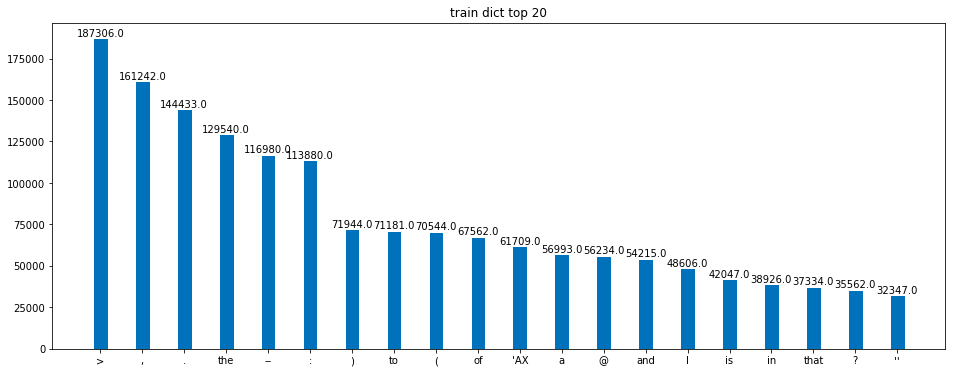

In [16]:
def bar_of_train_dict(cnt):
    name_list = []
    num_list = []
    for key,value in cnt.most_common(20):
        name_list.append(key)
        num_list.append(value)

    font_size = 10 # 字体大小
    fig_size = (16, 6) # 图表大小

    # 更新字体大小
    mpl.rcParams['font.size'] = font_size
    # 更新图表大小
    mpl.rcParams['figure.figsize'] = fig_size
    # 设置柱形图宽度
    bar_width = 0.35

    index = np.arange(20)
    # 绘制 train
    rects = plt.bar(index, num_list, bar_width, color='#0072BC')
    # X轴标题
    plt.xticks(index, name_list)
    # Y轴范围
    #plt.ylim(ymax=100, ymin=0)
    # 图表标题
    plt.title('train dict top 20')
    # 图例显示在图表下方
    #plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, ncol=5)

    # 添加数据标签
    def add_labels(rects):
        for rect in rects:
            height = rect.get_height()
            plt.text(rect.get_x() + rect.get_width() / 2, height, height, ha='center', va='bottom')
            # 柱形图边缘用白色填充，纯粹为了美观
            rect.set_edgecolor('white')

    add_labels(rects)

    
bar_of_train_dict(train_dict_cnt)

可以看出：出现频率高的很多都是标点符号等这些没有实际意义的字符。下面进行预处理：

去掉符号，数字等；去掉剩余的单个字母

In [17]:
import re
def data_clean(text):
    text = text.replace('\n'," ") #删掉空行  
    text = re.sub(r"-", " ", text) #把 "-" 的单词分为两个
    text = re.sub(r"\d+/\d+/\d+", "", text) #删掉日期  
    text = re.sub(r"[0-2]?[0-9]:[0-6][0-9]", "", text) #删掉时间  
    text = re.sub(r"[\.\w]+@[\.\w]+", "", text) #删掉邮箱地址  
    text = re.sub(r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*,]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", "", text) #删掉网址  
    pure_text = ''  
    # 删掉特殊字符（数字）等等
    for letter in text:  
        # 只留下字母和空格 
        if letter.isalpha() or letter==' ':  
            pure_text += letter
        else:
            pure_text += ' '
    #去掉单个字母
    text = ' '.join(word for word in pure_text.split() if len(word)>1) 
    return text

train_data_clean = [data_clean(temp) for temp in train_data.data]

train_tokens = [word_tokenize(temp) for temp in train_data_clean]

In [18]:
train_dict_cnt = get_dict_cnt(train_tokens)
print(len(train_dict_cnt))

104860


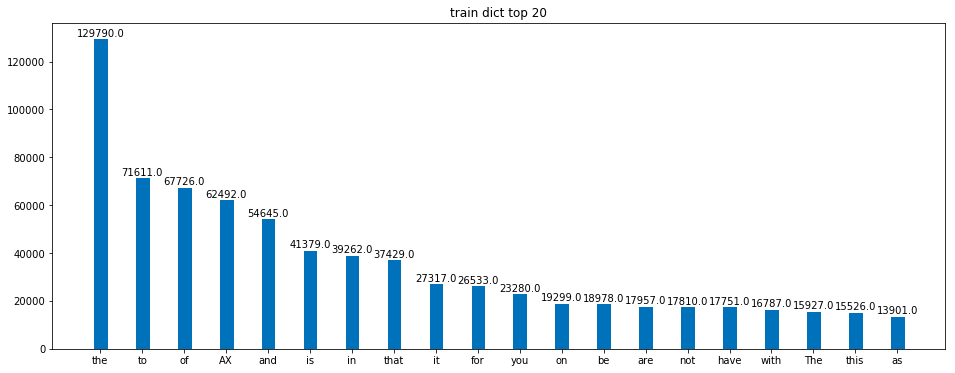

In [19]:
bar_of_train_dict(train_dict_cnt)

词典长度已经明显缩小，频率最高的前20个词汇也变为非字符的了。

单词转小写

In [20]:
train_tokens = [word_tokenize(temp.lower()) for temp in train_data_clean]
train_dict_cnt = get_dict_cnt(train_tokens)
print(len(train_dict_cnt))

82530


去掉停用词，使用nltk停用词语料库

In [21]:
from nltk.corpus import stopwords
stopwords_list = stopwords.words('english')
print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [22]:
train_tokens_stopwords = [[temp for temp in temp_list if stopwords_list.count(temp) == 0]for temp_list in train_tokens]

In [23]:
train_dict_cnt = get_dict_cnt(train_tokens_stopwords)
print(len(train_dict_cnt))

82386


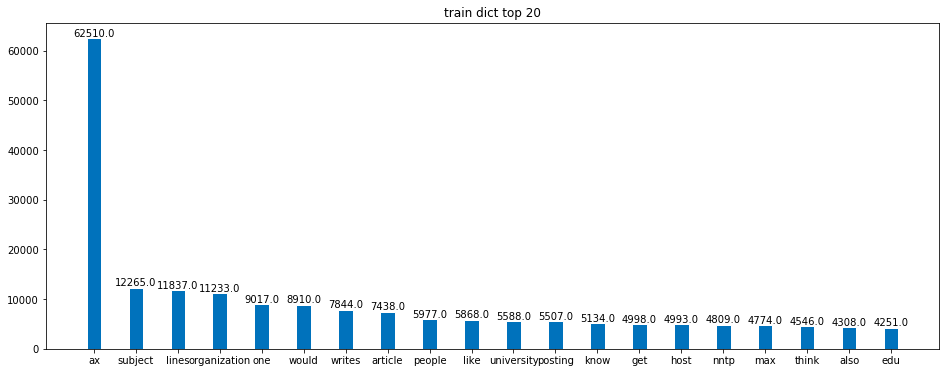

In [24]:
bar_of_train_dict(train_dict_cnt)

可以看出：出现频率高的介词（“over”，“under”，“above”），还有限定词（“the”、“a”、“an”、“that”、和“those”）等已经被去掉。这些词汇没有实际意义。

同一词（如单复数）的统一

In [25]:
from nltk.stem.wordnet import WordNetLemmatizer  
from nltk import pos_tag
#词形还原  
def lemmatize(token, tag):  
    if tag[0].lower() in ['n','v']:  
        return lemmatizer.lemmatize(token, tag[0].lower())  
    return token
lemmatizer = WordNetLemmatizer()
print([lemmatize(token, tag) for token, tag in pos_tag(['lying','had','women','shoes'])])

['lie', 'have', 'woman', 'shoe']


In [26]:
train_tokens_tagged_corpus = [pos_tag(temp) for temp in train_tokens_stopwords]
train_tokens_lemmatize = [[lemmatize(token, tag) for token, tag in temp] for temp in train_tokens_tagged_corpus]

train_dict_cnt = get_dict_cnt(train_tokens_lemmatize)
print(len(train_dict_cnt))

74903


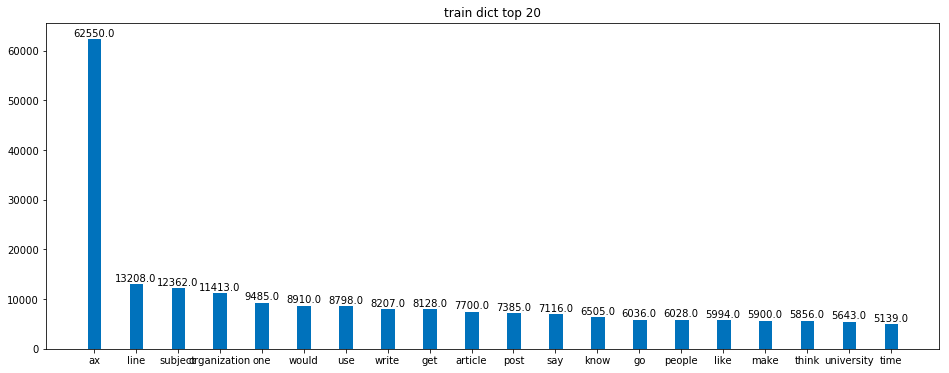

In [27]:
bar_of_train_dict(train_dict_cnt)

分析比较预处理过程，词典长度变化：

| 处理步骤 	|  开始  	| 数据清理 	| 转小写 	| 去掉停用词 	| 同一词统一 	|
|:--------:	|:------:	|:--------:	|:------:	|:----------:	|:----------:	|
| 词典长度 	| 211081 	|  104860  	|  82530 	|    82386   	|    74902   	|

可以看出，经过预处理，词典长度逐渐降低了。有效的达到了降维的目的。

下面对测试数据进行预处理

In [27]:
test_data_clean = [data_clean(temp) for temp in test_data.data]
test_tokens = [word_tokenize(temp.lower()) for temp in test_data_clean]

test_tokens_stopwords = [[temp for temp in temp_list if stopwords_list.count(temp) == 0]for temp_list in test_tokens]

test_tokens_tagged_corpus = [pos_tag(temp) for temp in test_tokens_stopwords]
test_tokens_lemmatize = [[lemmatize(token, tag) for token, tag in temp] for temp in test_tokens_tagged_corpus]

test_dict_cnt = get_dict_cnt(test_tokens_lemmatize)
print(len(test_dict_cnt))

57814


## 模型分析

数据划分，将训练数据集划分为80%的训练数据，20%的验证数据

In [28]:
# 导入 train_test_split
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_tokens_lemmatize, train_data.target, test_size=0.2, random_state=0,
                                                    stratify = train_data.target)

X_test,y_test = test_tokens_lemmatize, test_data.target

In [29]:
# 显示切分的结果
print("Training set has {} samples.".format(len(X_train)))
print("Validation set has {} samples.".format(len(X_val)))
print("Testing set has {} samples.".format(len(X_test)))

print("Training set has {} labels.".format(len(y_train)))
print("Validation set has {} labels.".format(len(y_val)))
print("Testing set has {} labels.".format(len(y_test)))

Training set has 9051 samples.
Validation set has 2263 samples.
Testing set has 7532 samples.
Training set has 9051 labels.
Validation set has 2263 labels.
Testing set has 7532 labels.


保存预处理的数据

In [30]:
X_train_content = [' '.join(temp_list) for temp_list in X_train]
X_val_content = [' '.join(temp_list) for temp_list in X_val]
X_test_content = [' '.join(temp_list) for temp_list in X_test]

In [31]:
np.save("X_train_content.npy", X_train_content)
np.save("X_val_content.npy", X_val_content)
np.save("X_test_content.npy", X_test_content)

np.save("y_train.npy", y_train)
np.save("y_val.npy", y_val)
np.save("y_test.npy", y_test)

### 词袋子模型

加载预处理的数据

In [1]:
import numpy as np
X_train_content = np.load("X_train_content.npy")
X_val_content = np.load("X_val_content.npy")
X_test_content = np.load("X_test_content.npy")

y_train = np.load("y_train.npy")
y_val = np.load("y_val.npy")
y_test = np.load("y_test.npy")

使用CountVectorizer进行文本特征提取

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
count_train = CountVectorizer(analyzer='word')
X_train_counts = count_train.fit_transform(X_train_content)
print('train shape:',X_train_counts.shape)
X_val_counts = count_train.transform(X_val_content)
print('val shape:',X_val_counts.shape)
print('vocabulary length:',len(count_train.vocabulary_))

train shape: (9051, 67166)
val shape: (2263, 67166)
vocabulary length: 67166


模型评估

In [3]:
from sklearn.metrics import fbeta_score, accuracy_score, log_loss
from time import time
from sklearn.externals import joblib
# 通过init_flag控制模型是新模型还是加载本地保存的模型
def sklearn_train_predict(learner,X_train,y_train,X_val,y_val,init_flag,clf_name):
    if init_flag:#需要训练，训练后保存模型
        start = time() # 获得程序开始时间
        learner.fit(X_train, y_train)
        end = time() # 获得程序结束时间
        # 计算训练时间
        print('train_time:',round(end - start, 3),"s")
        joblib.dump(learner, clf_name)
    else:#不需要训练，直接加载已有模型
        learner = joblib.load(clf_name)
    
    # 得到在验证集上的预测值
    start = time() # 获得程序开始时间
    predictions_val = learner.predict(X_val)
    predict_proba_val = learner.predict_proba(X_val)
    end = time() # 获得程序结束时间
    
    # 计算预测用时
    print('pred_time:',round(end - start, 3),"s")
        
    # 计算在验证上的准确率
    acc_val = accuracy_score(y_val,predictions_val)
    print('acc_val:{0:.3f}'.format(acc_val))
    
    # 计算在验证上的log_loss
    log_loss_val = log_loss(y_val,predict_proba_val)
    print('log_loss_val:{0:.3f}'.format(log_loss_val))

In [4]:
# 从sklearn中导入三个分类模型
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
# 初始化三个模型
clf_A = DecisionTreeClassifier()
clf_B = SVC(kernel = 'linear',probability=True)
clf_C = MultinomialNB()
init_flag = False #是否进行训练
#进行训练评估
print('DecisionTreeClassifier:')
sklearn_train_predict(clf_A,X_train_counts,y_train,X_val_counts,y_val,init_flag,'cv_dtc.pkl')
print('SVC:')
sklearn_train_predict(clf_B,X_train_counts,y_train,X_val_counts,y_val,init_flag,'cv_svc.pkl')
print('MultinomialNB:')
sklearn_train_predict(clf_C,X_train_counts,y_train,X_val_counts,y_val,init_flag,'cv_mnb.pkl')

DecisionTreeClassifier:
pred_time: 0.006 s
acc_val:0.654
log_loss_val:11.935
SVC:
pred_time: 23.807 s
acc_val:0.848
log_loss_val:0.586
MultinomialNB:
pred_time: 0.021 s
acc_val:0.849
log_loss_val:2.613


使用TfidfVectorizer进行文本特征提取

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfief_train = TfidfVectorizer(analyzer='word')
X_train_tfief = tfief_train.fit_transform(X_train_content)
print('train shape:',X_train_tfief.shape)
X_val_tfief = tfief_train.transform(X_val_content)
print('val shape:',X_val_tfief.shape)
print('vocabulary length:',len(tfief_train.vocabulary_))

train shape: (9051, 67166)
val shape: (2263, 67166)
vocabulary length: 67166


In [6]:
# 初始化三个模型
clf_A = DecisionTreeClassifier()
clf_B = SVC(kernel = 'linear',probability=True)
clf_C = MultinomialNB()
init_flag = False #是否进行训练
#进行训练评估
print('DecisionTreeClassifier:')
sklearn_train_predict(clf_A, X_train_tfief, y_train, X_val_tfief, y_val,init_flag,'tfid_dtc.pkl')
print('SVC:')
sklearn_train_predict(clf_B, X_train_tfief, y_train, X_val_tfief, y_val,init_flag,'tfid_svc.pkl')
print('MultinomialNB:')
sklearn_train_predict(clf_C, X_train_tfief, y_train, X_val_tfief, y_val,init_flag,'tfid_mnb.pkl')

DecisionTreeClassifier:
pred_time: 0.017 s
acc_val:0.641
log_loss_val:12.393
SVC:
pred_time: 30.568 s
acc_val:0.914
log_loss_val:0.308
MultinomialNB:
pred_time: 0.028 s
acc_val:0.865
log_loss_val:1.008


文本特征提取对比

|  模型预测准确率 | DecisionTreeClassifier |  SVC  | MultinomialNB |
|:---------------:|:----------------------:|:-----:|:-------------:|
| CountVectorizer |          0.654         | 0.848 |     0.849     |
| TfidfVectorizer |          0.641         | 0.914 |     0.865     |

|  模型预测log_loss | DecisionTreeClassifier |  SVC  | MultinomialNB |
|:---------------:|:----------------------:|:-----:|:-------------:|
| CountVectorizer |          11.935        | 0.586 |     2.613     |
| TfidfVectorizer |          12.393        | 0.308 |     1.008     |

通过对比分析：模型在决策树分类器上表现不佳；在支持向量机分类器和朴素贝叶斯分类器上表现不错。总体来说，使用TfidfVectorizer进行文本特征提取，准确率有所提升，log loss有所下降。并且在支持向量机分类器上表现很不错，准确率达到了0.914，而log loss降到了0.308，表现不错。

模型调优

In [17]:
# 导入'GridSearchCV', 'make_scorer'和其他一些需要的库
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
# 初始化分类器
clf = SVC(kernel = 'linear',probability=True)#MultinomialNB() 

# 创建进行调节的参数列表
parameters = {'C':(0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0)}#alpha C 0.01,0.1,0.2,0.5,0.9,1.0,1.1,1.5,2.0,10,20,50,100

# 创建一个accuracy_score打分对象
scorer = make_scorer(score_func=log_loss,greater_is_better=False,needs_proba=True)

#在分类器上使用网格搜索，使用'scorer'作为评价函数
grid_obj = GridSearchCV(estimator=clf,param_grid=parameters,scoring=scorer,n_jobs=-2,cv=10)

init_flag = False # 模型是否需要训练
clf_name = 'tfid_best.pkl'
if init_flag:#需要训练，训练后保存模型
    start = time() # 获得程序开始时间
    # 用训练数据拟合网格搜索对象并找到最佳参数
    grid_obj.fit(X_train_tfief, y_train)
    end = time() # 获得程序结束时间
    # 计算训练时间
    print('grid train_time:',round(end - start, 3),"s")
    joblib.dump(grid_obj, clf_name)
else:#不需要训练，直接加载已有模型
    grid_obj = joblib.load(clf_name)

# 得到estimator
best_clf = grid_obj.best_estimator_

# 使用没有调优的模型做预测
clf = joblib.load('tfid_svc.pkl')#'tfid_svc.pkl' 'tfid_mnb.pkl'
predictions = clf.predict(X_val_tfief)
predict_proba_val = best_clf.predict_proba(X_val_tfief)
best_predictions = best_clf.predict(X_val_tfief)
best_proba_val = best_clf.predict_proba(X_val_tfief)

# 汇报调参前和调参后的分数
print("Unoptimized model\n------")
print("Accuracy score on validation data: {:.4f}".format(accuracy_score(y_val,predictions)))
print('Log_loss_val on the validation data: {:.4f}'.format(log_loss(y_val,predict_proba_val)))
print("\nOptimized Model\n------")
print("Final accuracy score on the validation data: {:.4f}".format(accuracy_score(y_val,best_predictions)))
# 计算在验证上的log_loss
print('Final log_loss_val on the validation data: {:.4f}'.format(log_loss(y_val,best_proba_val)))
print('Final best_params_:',grid_obj.best_params_)
#print(grid_obj.grid_scores_)

grid train_time: 9257.607 s
Unoptimized model
------
Accuracy score on validation data: 0.9143
Log_loss_val on the validation data: 0.3094

Optimized Model
------
Final accuracy score on the validation data: 0.9138
Final log_loss_val on the validation data: 0.3094
Final best_params_: {'C': 10.0}


可以看出，调优后得到的模型准确率比原来稍微低一些，使用原模型对测试集进行预测

In [18]:
X_test_tfief = tfief_train.transform(X_test_content)
print('val shape:',X_test_tfief.shape)

val shape: (7532, 67166)


In [19]:
test_predictions = clf.predict(X_test_tfief)
test_proba_val = clf.predict_proba(X_test_tfief)
print("Accuracy score on test data: {:.4f}".format(accuracy_score(y_test,test_predictions)))
print('Log_loss_val on the test data: {:.4f}'.format(log_loss(y_test,test_proba_val)))

Accuracy score on test data: 0.8216
Log_loss_val on the test data: 0.6271


可以看到，测试数据集上，准确率达到0.8216，Log_loss为0.6271，效果还是不错的。

## 词向量模型

加载预处理的数据

In [1]:
import numpy as np
X_train_content = np.load("X_train_content.npy")
X_val_content = np.load("X_val_content.npy")
X_test_content = np.load("X_test_content.npy")

y_train = np.load("y_train.npy")
y_val = np.load("y_val.npy")
y_test = np.load("y_test.npy")

使用Word2Vec进行文本特征提取

In [2]:
# 引入 word2vec
from gensim.models import word2vec
#忽略警告
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')

D:\Users\Administrator\Anaconda2\envs\GPU\lib\site-packages\gensim\utils.py:1167: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [3]:
EMBEDDING_DIM = 200 # 词向量空间维度
news_fname = '20news.model'
mode_init = False

In [4]:
if mode_init:
    sentences = []
    sentences.extend([temp.split(' ') for temp in X_train_content])
    sentences.extend([temp.split(' ') for temp in X_val_content])
    sentences.extend([temp.split(' ') for temp in X_test_content])
    news_model = word2vec.Word2Vec(sentences, size=EMBEDDING_DIM, window=5)  
    news_model.save(news_fname)
else:
    news_model = word2vec.Word2Vec.load(news_fname)

简单评测

In [5]:
def simple_test_word2vec(model):
    print(model.wv.most_similar(positive=['woman', 'king'], negative=['man'], topn=1))
    print(model.wv.doesnt_match("breakfast cereal dinner lunch".split()))
    print(model.wv.similarity('woman', 'man'))
    print(model.wv.most_similar(['man']))

In [6]:
simple_test_word2vec(news_model)

[('rodney', 0.6872316598892212)]
cereal
0.622318548029
[('son', 0.6824347972869873), ('wast', 0.676836371421814), ('father', 0.6753490567207336), ('thou', 0.6624834537506104), ('holy', 0.6621533036231995), ('spirit', 0.6599425077438354), ('mother', 0.6433863043785095), ('straw', 0.6420932412147522), ('tree', 0.6334018707275391), ('beautiful', 0.6254920363426208)]


使用text8语料库

In [7]:
text8_fname = 'text8.model'
mode_init = False

In [8]:
if mode_init:
    sentences = word2vec.Text8Corpus('text8')
    text8_model = word2vec.Word2Vec(sentences, size=EMBEDDING_DIM, window=5)    
    text8_model.save(text8_fname)
else:
    text8_model = word2vec.Word2Vec.load(text8_fname)

In [9]:
simple_test_word2vec(text8_model)

[('queen', 0.6610816121101379)]
cereal
0.698395143779
[('woman', 0.6983951926231384), ('girl', 0.5940089225769043), ('creature', 0.5596704483032227), ('boy', 0.5359858274459839), ('stranger', 0.5305899381637573), ('person', 0.5273809432983398), ('god', 0.5049078464508057), ('men', 0.4925699532032013), ('gentleman', 0.48531436920166016), ('lover', 0.48378199338912964)]


通过观察，两个语料库得到的结果有些差别，但是总体差距不大。因此，这里选择使用新闻数据集得到的Word2Vec词向量，这样更贴近需要训练和预测的数据内容

提取特征:单词与序号之间的对应关系靠单词的索引表 word_index 来记录;标签处理成 one-hot 向量，用 keras 的 to_categorical 实现

In [10]:
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
import numpy as np

all_texts = []
all_texts.extend(X_train_content)
all_texts.extend(X_val_content)
all_texts.extend(X_test_content)

all_texts_tokenizer = Tokenizer()
all_texts_tokenizer.fit_on_texts(all_texts)
all_texts_word_index = all_texts_tokenizer.word_index

print('Found %s unique all texts tokens.' % len(all_texts_word_index))

all_labels = []
all_labels.extend(y_train)
all_labels.extend(y_val)
all_labels.extend(y_test)

all_labels = to_categorical(np.asarray(all_labels))

y_train_labels = to_categorical(np.asarray(y_train))
print('Shape of train label tensor:', y_train_labels.shape)

y_val_labels = to_categorical(np.asarray(y_val))
print('Shape of val label tensor:', y_val_labels.shape)

y_test_labels = to_categorical(np.asarray(y_test))
print('Shape of test label tensor:', y_test_labels.shape)

Using TensorFlow backend.


Found 98182 unique all texts tokens.
Shape of train label tensor: (9051, 20)
Shape of val label tensor: (2263, 20)
Shape of test label tensor: (7532, 20)


In [11]:
MAX_SEQUENCE_LENGTH = 800 # 每条新闻最大长度

In [12]:
from keras.preprocessing.sequence import pad_sequences
X_train_sequences = pad_sequences(all_texts_tokenizer.texts_to_sequences(X_train_content), maxlen=MAX_SEQUENCE_LENGTH)
X_val_sequences = pad_sequences(all_texts_tokenizer.texts_to_sequences(X_val_content), maxlen=MAX_SEQUENCE_LENGTH)
X_test_sequences = pad_sequences(all_texts_tokenizer.texts_to_sequences(X_test_content), maxlen=MAX_SEQUENCE_LENGTH)

In [13]:
print('Shape of train tensor:', X_train_sequences.shape)
print('Shape of val tensor:', X_val_sequences.shape)
print('Shape of test tensor:', X_test_sequences.shape)

Shape of train tensor: (9051, 800)
Shape of val tensor: (2263, 800)
Shape of test tensor: (7532, 800)


CNN模型

In [14]:
from keras.utils import plot_model
from keras.layers import Embedding
import gensim

w2v_model = news_model
embedding_matrix = np.zeros((len(all_texts_word_index) + 1, EMBEDDING_DIM))

for word, i in all_texts_word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = np.asarray(w2v_model.wv[word],dtype='float32')
        
embedding_layer = Embedding(len(all_texts_word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

In [15]:
from keras.layers import Dense, Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Sequential

model = Sequential()
model.add(embedding_layer)

## 卷积层
model.add(Conv1D(filters=32,kernel_size=3,strides=1,padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2,strides=2,padding='same'))#使得输出shape为输入的一半
model.add(Dropout(0.5))

model.add(Conv1D(filters=64,kernel_size=3,strides=1,padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2,strides=2,padding='same'))#使得输出shape为输入的一半
model.add(Dropout(0.5))

model.add(Conv1D(filters=128,kernel_size=3,strides=1,padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2,strides=2,padding='same'))#使得输出shape为输入的一半
model.add(Dropout(0.5))

'''
model.add(Conv1D(filters=256,kernel_size=3,strides=1,padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2,strides=2,padding='same'))#使得输出shape为输入的一半
model.add(Dropout(0.25))
'''
#F全连接层
model.add(Flatten())
model.add(Dense(1024))#EMBEDDING_DIM
model.add(Activation('relu'))
model.add(Dropout(0.5))
#输出层
model.add(Dense(all_labels.shape[1]))
model.add(Activation('softmax'))
model.summary()

#plot_model(model, to_file='model.png',show_shapes=True)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',#adam,sgd,rmsprop
              metrics=['accuracy'])
history = model.fit(X_train_sequences, y_train_labels, validation_data=(X_val_sequences, y_val_labels), epochs=60, batch_size=128)
#model.save_weights('word_vector_cnn.h5')
#print(model.evaluate(X_test_sequences, y_test_labels))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 800, 200)          19636600  
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 800, 32)           19232     
_________________________________________________________________
activation_1 (Activation)    (None, 800, 32)           0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 400, 32)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 400, 32)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 400, 64)           6208      
_________________________________________________________________
activation_2 (Activation)    (None, 400, 64)           0         
__________

9051/9051 [==============================] - 6s 611us/step - loss: 0.6477 - acc: 0.7784 - val_loss: 0.8165 - val_acc: 0.7380
Epoch 40/60
9051/9051 [==============================] - 6s 613us/step - loss: 0.6491 - acc: 0.7762 - val_loss: 0.8153 - val_acc: 0.7393
Epoch 41/60
9051/9051 [==============================] - 6s 611us/step - loss: 0.6194 - acc: 0.7868 - val_loss: 0.8210 - val_acc: 0.7525
Epoch 42/60
9051/9051 [==============================] - 6s 612us/step - loss: 0.6227 - acc: 0.7868 - val_loss: 0.8076 - val_acc: 0.7459
Epoch 43/60
9051/9051 [==============================] - 6s 610us/step - loss: 0.6226 - acc: 0.7832 - val_loss: 0.8038 - val_acc: 0.7419
Epoch 44/60
9051/9051 [==============================] - 6s 612us/step - loss: 0.6223 - acc: 0.7890 - val_loss: 0.8153 - val_acc: 0.7459
Epoch 45/60
9051/9051 [==============================] - 6s 614us/step - loss: 0.6177 - acc: 0.7851 - val_loss: 0.8130 - val_acc: 0.7415
Epoch 46/60
9051/9051 [==============================

训练集和验证集的损失曲线：

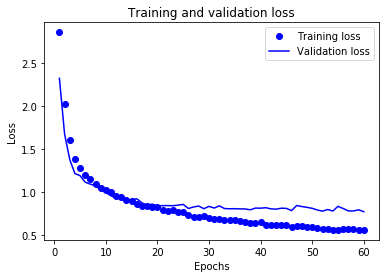

In [16]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

训练集和验证集的正确率曲线：

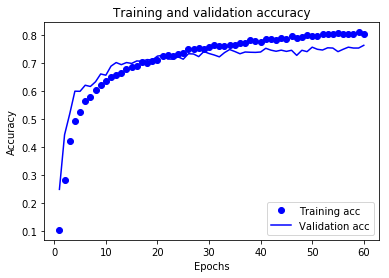

In [17]:
plt.clf()   # clear figure
plt.clf()   # clear figure

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

对测试集进行预测

In [18]:
print(model.evaluate(X_test_sequences, y_test_labels))

7532/7532 [==============================] - 2s 281us/step
[1.0381810965844436, 0.71879978754136764]


可以看出：在测试集上，准确率为0.71879978754136764，log_loss为1.0381810965844436，该结果相对来说还可以。